<a href="https://colab.research.google.com/github/jash-ai/QuantFinanceIntro/blob/main/GeometricBrownianMotion_SDE_Monte_Carlo_PLTR_future_jk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Preface/Introduction**

(note that much of the work below is based on the writings and teachings of Paul Wilmott and also the online financelab tutorial here: https://www.youtube.com/watch?v=gCkllPz_e2g&list=PL282rsT1FosVRvpcKOIRhLp3q6yX19ZV0&index=1&t=1265s)

Geometric Brownian Motion: Using a stochastic differential equation (SDE) together with a brownian motion (weiner process) to model possible future paths of stock prices (and then run that model multiple times in  a monte carlo simulation).

So firstly lets take a look at the stock pricing model which we are going to build in python (before running that model thousands of times through a monte carlo simulation to generate thousands of possible future paths for the stock). That model is a combination of a Stochastic differential equation and a weiner process (brownian motion).

we're going to use laTex notation within google colab in order to state the model in scientific/mathematical notation before describing it. And i'm using (as a reference) the following notebook: https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/main/lessons/00/intro_to_latex.ipynb#scrollTo=yy7o4iwaTHCx   to help with the laTex notation.

The model:

\begin{align}
\frac{dS}{S} = \mu dt + \sigma dW_1
\end{align}

Lets break the model down, so firstly dS is a small change in the Stock price (for example what it will change to tomorrow) whereas S is what the stock is currently and therefore

\begin{align}
\frac{dS}{S}
\end{align}

is a comparison of the changed stock price (the price tomorrow) compared to the current price/the price today. This stated change (comparing the current stock price to the changed process in the a next moment of time) is often called: The Return.

Note it is also important to understand that this stated change is a single change and therefore is for a single step or time moment in the model and that what 'd' is referring to (a small moment in time), d is also referring to a small change.

So if the left hand side of the equation (the SDE) is referring to a change, then the right hand side of the equation is modelling that same change but in more detail.
The change in stock price (in more detail) is comprised of two elements:  the first element being essentially what is called 'the drift' or a fraction of the expected annualised average movement, this is this portion:

\begin{align}
\mu dt
\end{align}

If we just left each step of the model as being that, and the annualised average change in the stock was a positive change e.g. 15% increase, then as the step change is just a small fraction (dt) of that, then every step change in the model would be positive. This would mean that every single modelled change is always positive and upwards, so we'd wind with just a 15% upward projection for every possible stock path with every single change always being positive, now whereas overall we know that the stock is 'likely' to increase across the year by 15%, it wouldn't be realistic to model step in that manner: real life doesn't work like that, we get highs, lows, ups and downs and erratic, random/stochastic behaviour, so we need a second 'random' element in the model which is this element:

\begin{align}
\sigma dW_1
\end{align}

  sigma ($\sigma$) is just the annualised volatility, i.e. on average across a  year how much the stock deviates from the average. Very often this is done by taking the standard deviation of each month, taking the average of that and projecting this across the year. 'di is just a fractional portion of sigma (relative to the model time step), so ($\sigma d$) is a time fractioned portion of the annualised volatility, but note that ($\sigma$) is one standard deviation, but there is an underlying assumption that if the stock price can change in accordance with the normal distribution, then the stock can change by as much as 3 standard deviations - so either upwards in size of 3 standard deviations or downwards in size (in accordance with the standard normal distribution model) by 3 standard deviations and the extent of the deviation follows the standard normal distribution but is also random, so it has a possible deviation range of as much 3 standard deviations but is most likely or most probable to deviate by 0 or between -1 and +1. And it is the weiner process (or brownian motion) that generates that stochastic sigma change factor and that stochastic normal distribution adjustment factor (generated by the weiner process) is this part of the equation:

  \begin{align}
\ W_1
\end{align}

Note that the Weiner process (brownian motion) instead of just stating it in the more abbreviated form 'W' in a more detailed form showing that it  follows the standard normal distribution, which is a normal dsitribution 'N' where the mean average of the distribution is 0 and the standard deviation is one standard deviation or 1, is annotated as follows:

  \begin{align}
\ N(0,\sigma^2 = t)
\end{align}

Note also that one standard deviation squared is the same as the time change and (that is to say if we take one standard deviation of change in stock value and square it we get the amount of time change). And therefore, simarly, if we take the square root of the change in time for one time step we get one standard deviation of a change in stock value. This relationship of the change in value of stock and change in value in time goes back to ideas noted by einstein and brown, which is that molecules although moving randomly tend to move in a square root relation to time.



Therefore the right hand side of the stochastic differential equation is stating the random (stochastic) change (the sigma part) together with predicatible regular 'drift' we routinely expect each year from the stock:

\begin{align}
 \mu dt + \sigma dW_1
\end{align}

So if we implement this equation in python, all we need to know is the annualised average movement of the stock and the annualised average standard deviation (one standard deviation) of the stock, and as long as we can take  a fraction of those parameters (in accordance with whichever timestep 'd' we agree upon e.g. one day (t), and adjust this by the normally distributed random (stochastic) factor (from the weiner process), then we're good to go, we now have a model that can effectively model each change in the stock in accordance with sound/realistic modelling principles that only model in the routine expected factor but also a reasonable random/stochastic factor.

Finally if we can use this model to effectively model a possible path of stock through the year, we can take that model and run it multiple times through a 'simulator' (whose job is literally just to keep re-running the model and record the results) and this simulator is popularly called: 'the monte carlo simulation', the reason we want to see this model run many times (and probably thousands of times) is because of the stochastic/random part of the model, this means that for each run of the model, we'll get different stock paths, but if we run the model thousands of times we will get 1: the highest possible future price from all possible paths 2: the lowest possible future price from all possible paths 3. the most likely/probably possible future path. I think that the most useful aspect of this model is calculating the highsest possible future price and the lowest possible future price, because these prices can be used for (and in fact are used in) OPTIONS pricing model.













In [1]:
# note that this ipython notebook has been built in google colab: https://colab.research.google.com/
#import the core modules which we need to build the model and run the simulation
# very often when we deal with data and also run scientific/mathematical operations across that data we need the following two packages

import numpy as np #contains array constructs and classes for random numbers and normal distributions
import pandas as pd # contain classes which allow us to handle data structures

# we also want visualisations so we're going to invoke a package useful for visualising data structures, namely matplotlib
import matplotlib.pyplot as plt
# a magic command here which gives intel about how code is working
%matplotlib inline

# we need historic finance data as a basis from which to model the future stock price paths
# note i'm assuming that googlecolab is making yfinance available (I may need to do a pip install if it isn't)
import yfinance as yf



In [2]:

# next we download a history of PLTR stock into a pandas dataframe called 'actual_hist'
# note the use of the download method of the yfinance class
# pulling palantir stocker which is ticker PLTR date range is 2024-01-01','2025-01-14'

actual_hist  = yf.download('PLTR','2024-01-01','2025-01-14')

# Move the index into a regular column
# reset_index(): This method resets the index of the DataFrame and uses the default
# integer index (0, 1, 2, etc.). By default, it places the old index as a column in the DataFrame.
actual_hist = actual_hist.reset_index()

# explain the following actual_hist['Date'] = pd.to_datetime(actual_hist['Date'])
# Ensure the "Date" column is in datetime format
# actual_hist['Date'] = pd.to_datetime(actual_hist['Date']) in Python is converting a column in a pandas DataFrame into datetime format
# actual_hist: This is your pandas DataFrame.
# 'Date': This is the name of the column in your DataFrame that contains date information.
# pd.to_datetime(): This is a pandas function that converts an argument to datetime format.
# It takes in various formats of date and time data (like strings) and converts them into pandas datetime objects.
# This conversion is helpful for performing date-time operations, such as filtering data by date ranges,
# extracting specific parts of the date (year, month, day), and resampling data by different time intervals.
actual_hist['Date'] = pd.to_datetime(actual_hist['Date'])

# The command actual_hist.set_index('Date', inplace=True) is used to set the 'Date' column of
# a pandas DataFrame as its index. Here's a breakdown of what each part does:
# actual_hist: This is your pandas DataFrame
# set_index('Date'): This method is used to set the 'Date' column as the index of the DataFrame.
# inplace=True: This parameter makes sure that the DataFrame is modified in place,
# meaning it will be changed directly without needing to create a new DataFrame.
actual_hist.set_index('Date', inplace=True)

# command actual_hist = actual_hist.sort_index(ascending=True) in
# Python is used to sort the DataFrame by its index
# sort_index(): This method sorts the DataFrame by its index (row labels).
# ascending=True: This parameter specifies that the sorting should be in
# ascending order (from lowest to highest). If you set it to False, the sorting would be in descending order.
actual_hist = actual_hist.sort_index(ascending=True)


# add a returns column which may be used to compute annualised drift and volatility subsequently
# he command actual_hist['DailyReturn'] = actual_hist['Close'].pct_change() is used to calculate the daily percentage change
# in the 'Close' prices of a DataFrame, and store the result in a new column called 'DailyReturn'.
# 'Close': This is the column in your DataFrame containing the closing prices of an asset (like a stock) for each day
# .pct_change(): This method calculates the percentage change between the current and the prior element in a DataFrame column.
# It measures how much the value has changed in percentage terms from one day to the next.
# 'DailyReturn' is the new column which will store this information
actual_hist['DailyReturn'] = actual_hist['Close'].pct_change()

# Replace NaN values in the DailyReturn column  with 0
# The command actual_hist['DailyReturn'] = actual_hist['DailyReturn'].fillna(0) is used
# to replace any NaN (Not a Number) values in the 'DailyReturn' column of a pandas DataFrame with 0.
# This operation ensures that there are no NaN values in the 'DailyReturn' column,
actual_hist['DailyReturn'] = actual_hist['DailyReturn'].fillna(0)

# same as above in the 'Close' fills any nan with 0
actual_hist['Close'] = actual_hist['Close'].fillna(0)
# we use the iloc function of the pandas dataset to look at the first row (0) and the last row (-1) to take a quick look and see
# if the data looks sensible at first sight:

# The command print(actual_hist.iloc[[0, -1]]) is used to
# print specific rows from a pandas DataFrame using integer-location-based indexing
# .iloc: This attribute is used for integer-location-based indexing to select specific rows and columns
# [0, -1]: This is a list of row positions you want to access:
# 0: This selects the first row of the DataFrame.
# -1: This selects the last row of the DataFrame. In Python, using negative indexing allows you to count from the end of the DataFrame
print(actual_hist.iloc[[0,-1]])


[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open    Volume  \
Ticker           PLTR       PLTR       PLTR       PLTR       PLTR      PLTR   
Date                                                                          
2024-01-02  16.580000  16.580000  16.950001  16.500000  16.950001  41626700   
2025-01-13  64.980003  64.980003  65.680000  63.400002  64.290001  68541700   

Price      DailyReturn  
Ticker                  
Date                    
2024-01-02    0.000000  
2025-01-13   -0.033898  


In [4]:
actual_hist

Price,Adj Close,Close,High,Low,Open,Volume,DailyReturn
Ticker,PLTR,PLTR,PLTR,PLTR,PLTR,PLTR,
Date,,,,,,,
2024-01-02,16.580000,16.580000,16.950001,16.500000,16.950001,41626700,0.000000
2024-01-03,16.090000,16.090000,16.379999,16.010000,16.120001,46865200,-0.029554
2024-01-04,16.250000,16.250000,16.580000,15.950000,16.049999,39937700,0.009944
2024-01-05,15.980000,15.980000,16.128000,15.664000,15.700000,57628800,-0.016615
2024-01-08,16.670000,16.670000,16.889999,16.139999,16.219999,49090000,0.043179
...,...,...,...,...,...,...,...
2025-01-06,75.919998,75.919998,80.059998,74.610001,78.690002,105619500,-0.049693
2025-01-07,69.989998,69.989998,75.389999,69.750000,75.199997,91727300,-0.078109


Text(0, 0.5, 'Close')

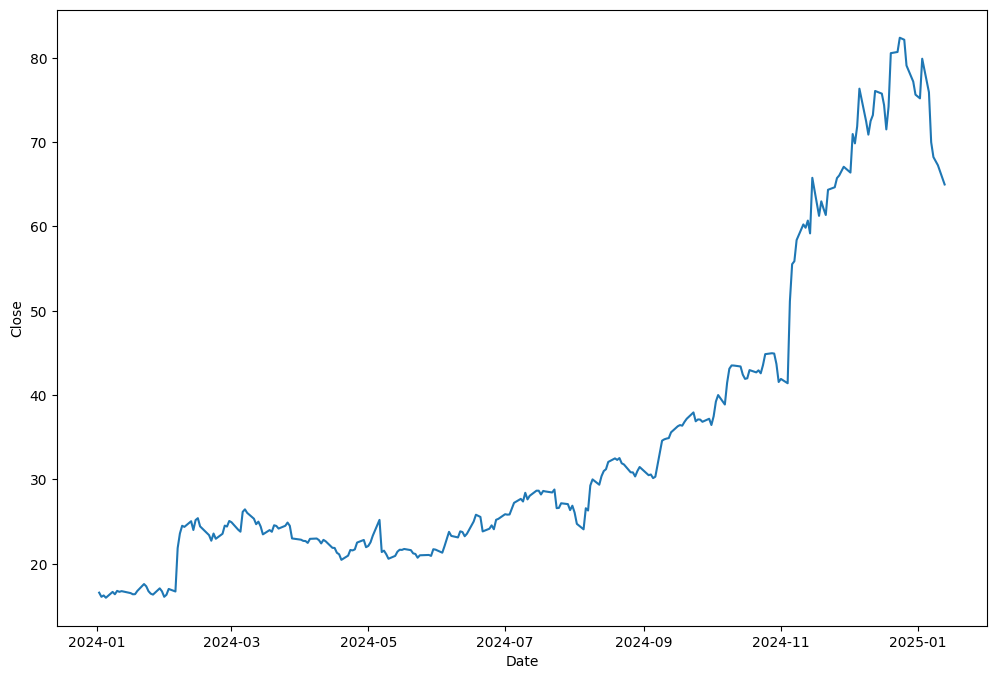

In [5]:
#now lets use pyplot to get a visualisation of the history of the TESLA stock (tsla) over time

#first we create a figure (or window) within which to hold the chart visualisation
# command fig = plt.figure(figsize=(12,8)) is used in Matplotlib,
# a popular plotting library in Python, to create a new figure with a specific size
# plt.figure(): This function is used to create a new figure. A figure in Matplotlib is like a canvas where you can draw one or more plots
# figsize: This parameter allows you to specify the size of the figure. It takes a tuple with two values (width, height) in inches. In this case,
# figsize=(12, 8) means the figure will be 12 inches wide and 8 inches tall.
# fig: This is a variable that stores the created figure object. You can use this variable to further customize the figure or add subplots.
fig = plt.figure(figsize=(12,8))

# next we create the essential chart on the basis of a specific dimension on the dataset, in this case the closing price (Close)
# note that the index field is automatically invoked in the chart, we don't need to specify its inclusion, in this case the index is 'date'
# The command plt.plot(actual_hist['Close']) is used to create a line plot of the 'Close' column from the actual_hist DataFrame
# plt.plot(): This is a function from Matplotlib that creates a line plot.
# actual_hist['Close']: This is the column from your DataFrame containing the closing prices of an asset
# When you use plt.plot(actual_hist['Close']), it plots the 'Close' values on the y-axis,
# and the index of the DataFrame (which could be dates if set previously) on the x-axis
plt.plot(actual_hist['Close'])


# we label the x axis which will show the index value 'date'
# plt.xlabel('Date') in your code sets the label of the x-axis to "Date"
plt.xlabel('Date')
# the y axis contains the value we are concerned to plot against the time/date index, namely the stock close price values, we add the y label:
# plt.ylabel('Close') in your code sets the label of the y-axis to "Close"
plt.ylabel('Close')




In [8]:
# now we start building the model   to predict full possible range of future prices

# from the historic data (given that it is daily data) we derive the number of time steps (n_t)
# which should be around 252 (1 year of trading days) - note we are going to use the year's date to get the annualised volatility
# and the annualised drift and also work out a 1 day time step and use these metrics to predict the next year's possible range of prices
# n_t = len(actual_hist) is used to calculate and store the number of rows (or length) of the DataFrame actual_hist in the variable n_t
# n_t: This is the variable that stores the result.
# len(actual_hist): This function returns the number of rows in the DataFrame actual_hist
n_t = len(actual_hist)

# print out the number of trading days from the historic data:
print ("Number of historic trading days in downloaded data ", n_t)

# next we're doing to state that we model 10000 stock paths using the model (in other words we'll run the monte carlo simulation which will run
# the model) 10000 times
# This line sets the variable n_mc to the value 10000.
# This variable likely represents the number of Monte Carlo simulations or iterations you want to run 10000 times
n_mc = 10000

# next we create a huge dataframe which will hold (in each column) each simulated pathway - the results for each run of the model
# note that each row holds each day, but that each column holds a unique stock pathway from each monte carlo model run
# 0.: This initializes the DataFrame with zeros. The 0. notation ensures the zeros are floats.
# index=actual_hist.index: This sets the index of the new DataFrame to be the same as the index of the actual_hist DataFrame.
# This is useful if actual_hist is indexed by dates or another relevant index.
# columns = list(range(1, n_mc+1)): This sets the column names to be a list of integers from 1 to n_mc (inclusive).
# The range(1, n_mc+1) generates a range of numbers from 1 to n_mc (10000 in this case)
# This will create a new DataFrame St with the same index as actual_hist, filled with zeros, and with 10000 columns named from 1 to 10000.
# This setup is typically used for simulations or storing results of computations over multiple iterations.
St = pd.DataFrame(0., index=actual_hist.index, columns = list(range(1,n_mc+1)))

# for all columns in the results dataframe (and therefore each possible pathway) update all columns (and therefore scenarios) to be the last
# known day of trading's close value (we will use the value as a basis upon which to predict the possible values for the next year)
# The code St.iloc[0] = actual_hist['Close'].iloc[-1] is used to set the value of the first row in the DataFrame
# St to the closing price of the last row in the actual_hist DataFrame
# St.iloc[0]: This accesses the first row of the DataFrame St using integer-location based indexing. The index 0 refers to the first row.
# actual_hist['Close'].iloc[-1]: This accesses the last value in the 'Close' column of the DataFrame actual_hist. The index -1 refers to the last row
# The code assigns the closing price from the last row of the actual_hist DataFrame to the entire first row of the St DataFrame.
# This is often the initial step in setting up Monte Carlo simulations,
# where you start each simulation with a known value before generating random variations.
St.iloc[0] = actual_hist['Close'].iloc[-1]

# update the date range (index) in the 'St' datafrane such that all rows state date values for the next year
# Add one year to each date in the index
# The code St.index = St.index + pd.DateOffset(years=1) is used to shift the index of the St DataFrame forward by one year
# St.index: This accesses the index (row labels) of the St DataFrame.
# pd.DateOffset(years=1): This creates a date offset that adds one year to each date in the index. pd.DateOffset is a
# flexible function that allows you to specify various time increments, such as days, months, years, etc
# St.index= St.index+ pd.DateOffset(years=1): This shifts all the dates in the index of St forward by one year.
# All the dates in the index have been moved forward by one year.
St.index = St.index + pd.DateOffset(years=1)
print(St.iloc[[0,-1]])


# next we state the main parameters for the stock (annualised volatility and the annualised mean average stock price also known as the drift)

# first we'll create a dataset for the last 60 days so as to use the most recent behaviour of the stock to also gauge what might
# happen next

#  Get the last 60 days of close prices

#last_60_days = pd.DataFrame(actual_hist, index=actual_hist.index, columns=["Close","Date"])
# code last_60_days = pd.DataFrame(actual_hist[["Close"]].iloc[-60:-1]) is used to create a new DataFrame containing the
# 'Close' prices for the last 60 days from the actual_hist DataFrame
# actual_hist[["Close"]]: This selects the 'Close' column from the actual_hist DataFrame.
# The double square brackets [[ ]] ensure that the result is a DataFrame rather than a Series.
# .iloc[-60:-1]:This is used to select rows by integer-location-based indexing. The slice [-60:-1] selects the last 60 rows, excluding the very last row
# The index -60 refers to the 60th row from the end, and -1 refers to the second to last row (since slicing in Python excludes the endpoint).
# The code creates a DataFrame last_60_days containing the 'Close' prices for the last
# 60 days (excluding the very last day) from the actual_hist DataFrame.
last_60_days = pd.DataFrame(actual_hist[["Close"]].iloc[-60:-1])
#last_60_days = actual_hist.iloc[-60]

print(last_60_days.iloc[[0,-1]])
print(f"\nNumber of rows: {len(last_60_days)}")

# add a returns column which may be used to compute annualised drift and volatility subsequently
# command last_60_days['DailyReturn'] = last_60_days['Close'].pct_change() is used to calculate the daily percentage change in the
# 'Close' prices for the last_60_days DataFrame and store the result in a new column called 'DailyReturn
# The resulting last_60_days DataFrame will include a new column 'DailyReturn' showing the percentage change in 'Close' prices
last_60_days['DailyReturn'] = last_60_days['Close'].pct_change()

# firstly compute the drift (also known as annualised mean but 'drift' is a business term which translates to a business growth assumption)
# mean_daily_return = actual_hist['DailyReturn'].mean() calculates the mean (average) of the 'DailyReturn' column in the actual_hist DataFrame
mean_daily_return = actual_hist['DailyReturn'].mean()

# last_60_days: A DataFrame containing data for the last 60 days.
# DailyReturn: A column in the DataFrame that represents the daily return.
# mean_daily_return_60days: A variable that stores the mean of the DailyReturn column over the last 60 days
mean_daily_return_60days = last_60_days['DailyReturn'].mean()

#  Annualize the drift
# The code you provided is used to annualize the drift (expected return) of daily returns.
# trading_days_per_year is set to 252 because there are, on average, 252 trading days in a year (excluding weekends and holidays).
# mean_daily_return is the average daily return. To annualize it, you multiply it by the number of trading days in a year
# (trading_days_per_year). This gives the expected return over a year
# mu is a variable that stores the annualized drift, which is now the expected return over a year.
# mean_daily_return_60days is the average daily return over the last 60 days. By multiplying it by the number of trading days in a year (trading_days_per_year),
# you get the annualized drift based on the last 60 days of data.
# code calculates the annualized expected return (drift) using both the overall mean daily return and the mean daily return over the last 60 days.
# This can help in understanding both long-term and short-term trends.
trading_days_per_year = 252  # Average number of trading days in a year
annualized_drift = mean_daily_return * trading_days_per_year
mu = annualized_drift
mu60days = mean_daily_return_60days * trading_days_per_year

print(f"Annualized Drift (μ) for PLTR in 2024: {mu}")
print(f"Annualized Drift (μ) for PLTR in 2024 using last 60 days data: {mu60days}")

# annualised volatility:
# actual_hist['DailyReturn']: This accesses the 'DailyReturn' column of a DataFrame named actual_hist
# .std(): This calculates the standard deviation of the 'DailyReturn' column, which measures the amount of variability
# or dispersion of daily returns. This value is stored in daily_volatility
# daily_volatility: The standard deviation of daily returns.
# np.sqrt(trading_days_per_year): This calculates the square root of the number of trading days in a year.
# NumPy's sqrt function is used here (imported as np).
# Multiplying daily_volatility by the square root of the number
# of trading days annualizes the daily volatility, giving the annualized volatility.
# This prints out the annualized volatility for the PLTR stock (assuming 'actual_hist' contains data for TSLA) over the last 60 days.
daily_volatility = actual_hist['DailyReturn'].std()
annualized_volatility = daily_volatility * np.sqrt(trading_days_per_year)
print(f"Annualized Volatility for PLTR (last 60 days): {annualized_volatility}")

daily_volatility60days = last_60_days['DailyReturn'].std()
annualized_volatility60days = daily_volatility60days * np.sqrt(trading_days_per_year)
print(f"Annualized Volatility for PLTR (last 60 days): {annualized_volatility60days}")
#******next we define the time step 'dt' which is conventionally stated as a fraction of 1 year)***********
# conventionally (in finance) time is phrased in relation to 1 year, which (conventionally) in finance is a 252 day trading year

# The line of code you provided is calculating the time increment (dt) for a simulation or a numerical method
# n_t: This variable represents the number of time steps or intervals in your simulation or numerical method
# 1.: This ensures the calculation is performed in floating-point arithmetic.
# (n_t - 1): This expression calculates the number of intervals (or steps) by subtracting one from the number of time steps.
# This is because if you have n_t points, you have n_t - 1 intervals between those points.
# dt: This variable stores the time increment, which is the duration of each time step
dt = 1./(n_t - 1)

# now that we have the day fraction defined we can adjust/scale the annualised volatility sigma to a day's worth fraction also
# annualized_volatility: This is the annualized volatility of the returns.
# np.sqrt(dt): This calculates the square root of the time increment dt.
# The square root is used here because volatility scales with the square root of time.
# Multiplying annualized_volatility by np.sqrt(dt) scales the annualized volatility to a daily volatility.
# This daily volatility is stored in daily_sigma.
daily_sigma = annualized_volatility*np.sqrt(dt)

# This prints out the calculated daily volatility (daily_sigma).
print ("The daily (scaled) volatility/sigma is: ", daily_sigma)

# annualized_volatility60days: This is the annualized volatility of the returns based on the last 60 days
# this line scales the annualized volatility based on the last 60 days to a daily volatility, which is stored in daily_sigma60days
daily_sigma60days  = annualized_volatility60days*np.sqrt(dt)

# This prints out the calculated daily volatility based on the last 60 days (daily_sigma60days).
print ("The daily (scaled) volatility/sigma  (last 60 days) is: ", daily_sigma60days)














Number of historic trading days in downloaded data  259
                1          2          3          4          5          6      \
Date                                                                           
2025-01-02  64.980003  64.980003  64.980003  64.980003  64.980003  64.980003   
2026-01-13   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

                7          8          9          10     ...      9991   \
Date                                                    ...              
2025-01-02  64.980003  64.980003  64.980003  64.980003  ...  64.980003   
2026-01-13   0.000000   0.000000   0.000000   0.000000  ...   0.000000   

                9992       9993       9994       9995       9996       9997   \
Date                                                                           
2025-01-02  64.980003  64.980003  64.980003  64.980003  64.980003  64.980003   
2026-01-13   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

     

                 1           2           3           4           5      \
Date                                                                     
2025-01-02  403.839996  403.839996  403.839996  403.839996  403.839996   
2025-12-31    0.000000    0.000000    0.000000    0.000000    0.000000   

                 6           7           8           9           10     ...  \
Date                                                                    ...   
2025-01-02  403.839996  403.839996  403.839996  403.839996  403.839996  ...   
2025-12-31    0.000000    0.000000    0.000000    0.000000    0.000000  ...   

                 9991        9992        9993        9994        9995   \
Date                                                                     
2025-01-02  403.839996  403.839996  403.839996  403.839996  403.839996   
2025-12-31    0.000000    0.000000    0.000000    0.000000    0.000000   

                 9996        9997        9998        9999        10000  
Date            

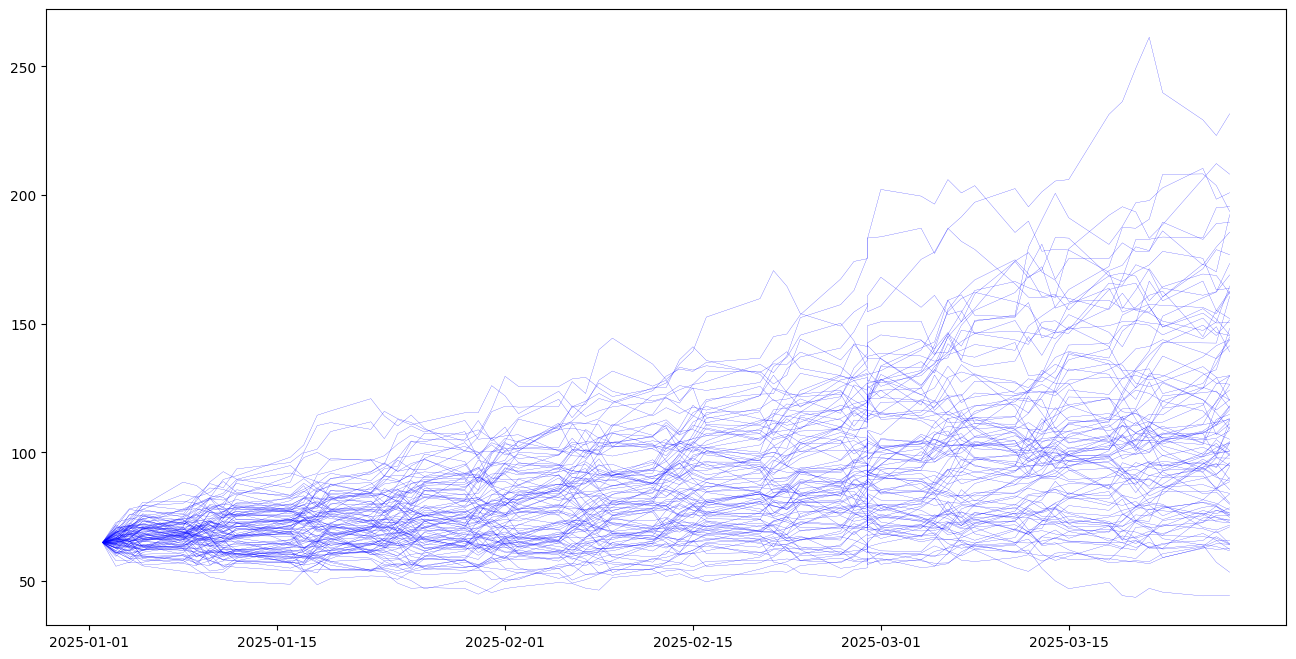

In [10]:

# the model is created and run through a montecarlo simulation and the results are output in the results dataframe ST
# note that the for each loop only tackles the number of rows/timesteps
# This line initiates a for loop that iterates over the range from 1 to n_t (the number of time steps).
# The loop variable i will take on values from 1 to  n_t - 1
for i in range (1, n_t):

    # dS_2_S is 10000 changes in stock generated using the stochastic differential equation (time adjust drift plus random normally distributed
    # time adjusted volatility) - i.e 10000 time step stock adjustments - one for each of the 10000 models , for one day
    # mu60days * dt: This term represents the drift component (expected return) scaled by the time increment dt.
    # daily_sigma60days * np.random.randn(n_mc):
    # This term represents the random shock component, scaled by the daily volatility (daily_sigma60days)
    # np.random.randn(n_mc) generates n_mc random samples from the standard normal distribution, simulating random fluctuations.
    # dS_2_S: This variable stores the combined drift and random shock, representing the change in the stock price as a
    # fraction of the current stock price
    dS_2_S = mu60days*dt + daily_sigma60days*np.random.randn(n_mc)

    # dS_2_S = mu*dt + daily_sigma*np.random.randn(n_mc)
    # he next day's values become the previous days values plus the model adjustment (for each day)
    # St.iloc[i-1]: This accesses the stock price at the previous time step.
    # St.iloc[i-1] * dS_2_S: This calculates the change in the stock price.
    # St.iloc[i]: This updates the stock price at the current time step by adding the change to the previous stock price.
    St.iloc[i] = St.iloc[i-1] + St.iloc[i-1]*dS_2_S

# This code is simulating the stock price evolution over time using a stochastic process, incorporating both the drift (expected return) and the volatility (random fluctuations).
# The loop iterates over each time step, updating the stock price based on the calculated change.

# St: This is your DataFrame containing stock price data.
# .iloc[0:60]: This is an index-based selection that extracts the rows from index 0 to 59 (the first 60 rows) of the DataFrame St
# last_60_days_initial: This variable stores the extracted data, which represents the stock prices for the initial 60 days
last_60_days_initial = St.iloc[0:60]

# create a plot and randomly select a specific number of paths resulting from the simulation/model and visualise
# and moreover display the results of the model against the actual historical price
fig = plt.figure(figsize=(16,8))
axl = fig.add_subplot(111)
# the choice method of the numpy random class is used to randomly pick a number from 1 to 10000, and this is done 20 times which
# also links to the for each loop being run 20 times - i.e. we pick 20 model results randomly from our set of model results 'ST'
# np.random.choice(np.array(range(1, n_mc+1)), size=100): This creates an array from 1 to n_mc and randomly selects 100 unique elements from it.
# np.random.choice is used for generating random samples from the array
# The for loop iterates over these 100 randomly selected elements. The variable i takes each value from the randomly selected array in each iteration.

for i in np.random.choice(np.array(range(1,n_mc+1)), size=100):
   # the random selected above 'i' is used to select a column from the results of the model 'ST' and this pathway is then plotted  in blue
   # line thickness being 0.5

   # axl.plot: This calls the plot method on the axis axl (assuming axl is a matplotlib Axes object).
   # last_60_days_initial[i]: This selects the i-th element from last_60_days_initial. It assumes that last_60_days_initial
   # is indexed in such a way that it can be directly accessed with i
   # 'b': This specifies the color of the plot line, in this case, blue
   # lw=0.15: This sets the line width of the plot to 0.15.
   # this code is generating 100 random indices, iterating over them,
   # and plotting the corresponding data from last_60_days_initial on the same axis with blue lines of width 0.15.
   axl.plot(last_60_days_initial[i], 'b', lw=0.15)
  #axl.plot(St[i], 'b', lw=0.25)




# in addition to the 20 randomly picked results of the model we also now add the actuals as red thicker line to the plot
#axl.plot(actual_hist['Close'],'r', lw=1 )
plt.show()

In [25]:
import pandas as pd

# Assuming last_60_days_initial is a DataFrame with stock price data for the last 60 days
min_values = last_60_days_initial.min(axis=0)  # Minimum values for each column
max_values = last_60_days_initial.max(axis=0)  # Maximum values for each column

# Create a new DataFrame to store the results
result_df = pd.DataFrame({
    'Min_Value': min_values,
    'Max_Value': max_values
})

# Reset the index for better readability
result_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(result_df)


      Min_Value   Max_Value
0     64.980003  113.655633
1     57.980047   98.130248
2     61.300311  163.558576
3     64.980003  155.925197
4     43.716685   73.087916
...         ...         ...
9995  57.597841   94.441662
9996  61.724240  124.187839
9997  60.385425  119.464052
9998  64.980003  137.415342
9999  64.343146  119.002867

[10000 rows x 2 columns]


In [26]:
import pandas as pd

# Assuming last_60_days_initial is a DataFrame with stock price data for the last 60 days
min_values = last_60_days_initial.min(axis=0)  # Minimum values for each column
max_values = last_60_days_initial.max(axis=0)  # Maximum values for each column
mean_values = last_60_days_initial.mean(axis=0)  # Mean values for each column
std_dev_values = last_60_days_initial.std(axis=0)  # Standard deviation values for each column

# Create a new DataFrame to store the results
result_df = pd.DataFrame({
    'Min_Value': min_values,
    'Max_Value': max_values,
    'Mean_Value': mean_values,
    'Standard_Deviation': std_dev_values
})

# Reset the index for better readability
result_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(result_df)


      Min_Value   Max_Value  Mean_Value  Standard_Deviation
0     64.980003  113.655633   85.327210           13.109575
1     57.980047   98.130248   74.995919           10.766030
2     61.300311  163.558576  105.929763           31.505028
3     64.980003  155.925197  107.918096           28.335428
4     43.716685   73.087916   58.087096            7.653083
...         ...         ...         ...                 ...
9995  57.597841   94.441662   71.423051           10.083718
9996  61.724240  124.187839   85.655411           16.134862
9997  60.385425  119.464052   90.639141           20.495370
9998  64.980003  137.415342   99.770364           16.335516
9999  64.343146  119.002867   89.094549           17.121793

[10000 rows x 4 columns]


In [28]:
# overall_min = result_df['Min_Value'].min(): This calculates the lowest value across all paths.
# overall_max = result_df['Max_Value'].max(): This calculates the highest value across all paths.
# overall_mean = result_df['Mean_Value'].mean(): This calculates the average mean value across all paths.
# overall_std_dev = result_df['Standard_Deviation'].std(): This calculates the standard deviation of the standard deviations across all paths.

# This will give you the overall statistics for the entire DataFrame result_df

overall_min = result_df['Min_Value'].min()
overall_max = result_df['Max_Value'].max()
overall_mean = result_df['Mean_Value'].mean()
overall_std_dev = result_df['Standard_Deviation'].mean()

print(f"Overall Lowest Value: {overall_min}")
print(f"Overall Highest Value: {overall_max}")
print(f"Overall Mean Value: {overall_mean}")
print(f"Overall Standard Deviation: {overall_std_dev}")


Overall Lowest Value: 24.10027983828929
Overall Highest Value: 436.98180595466135
Overall Mean Value: 85.78284763705561
Overall Standard Deviation: 17.066016978857213


In [30]:
print(last_60_days_initial)

                 1          2           3           4          5      \
Date                                                                   
2025-01-02   64.980003  64.980003   64.980003   64.980003  64.980003   
2025-01-03   65.257191  62.847962   62.724487   65.316195  65.521581   
2025-01-04   66.469441  62.165147   65.252965   68.897608  63.130194   
2025-01-05   65.249228  62.214957   65.779180   69.398394  63.592234   
2025-01-08   65.305796  57.980047   64.901554   73.131818  59.429158   
2025-01-09   67.952468  60.604183   61.854263   72.394653  60.178716   
2025-01-10   69.299627  58.659708   63.359898   70.573680  59.651967   
2025-01-11   72.568453  60.994027   61.300311   70.649804  56.608135   
2025-01-12   78.330774  64.005433   62.415795   66.994671  58.048002   
2025-01-16   81.597989  65.881764   64.514340   67.655057  60.255335   
2025-01-17   81.028939  70.021302   67.093849   69.677604  58.158250   
2025-01-18   80.720832  67.663504   68.219317   71.187690  56.49